In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense , Activation, Dropout
from keras.optimizers import Nadam

from keras import  backend as K

from subprocess import check_output
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model

In [ ]:
from keras.datasets import mnist


(x_train, y_train),(x_test, y_test) = mnist.load_data()


unique, counts = np.unique(y_train, return_counts=True)
print("Train labels: ", dict(zip(unique, counts)))


unique, counts = np.unique(y_test, return_counts=True)
print("\nTest labels: ", dict(zip(unique, counts)))

11490434/11490434 [==============================] - 0s 0us/step
Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}

Test labels:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


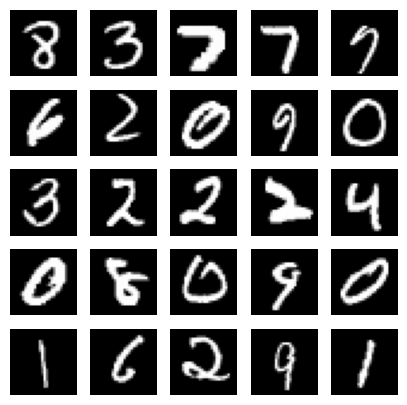

In [ ]:
indexes = np.random.randint(0, x_train.shape[0], size=25)
images = x_train[indexes]
labels = y_train[indexes]


plt.figure(figsize=(5,5))
for i in range(len(indexes)):
    plt.subplot(5, 5, i + 1)
    image = images[i]
    plt.imshow(image, cmap='gray')
    plt.axis('off')

plt.show()
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [ ]:
x_train = np.reshape(x_train, (-1, 28, 28, 1))
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, (-1, 28, 28, 1))
x_test = x_test.astype('float32') / 255

In [ ]:
batch_size = 128
hidden_units = 256
dropout = 0.45

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last',
                 input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), strides=2, padding='valid' ))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                        

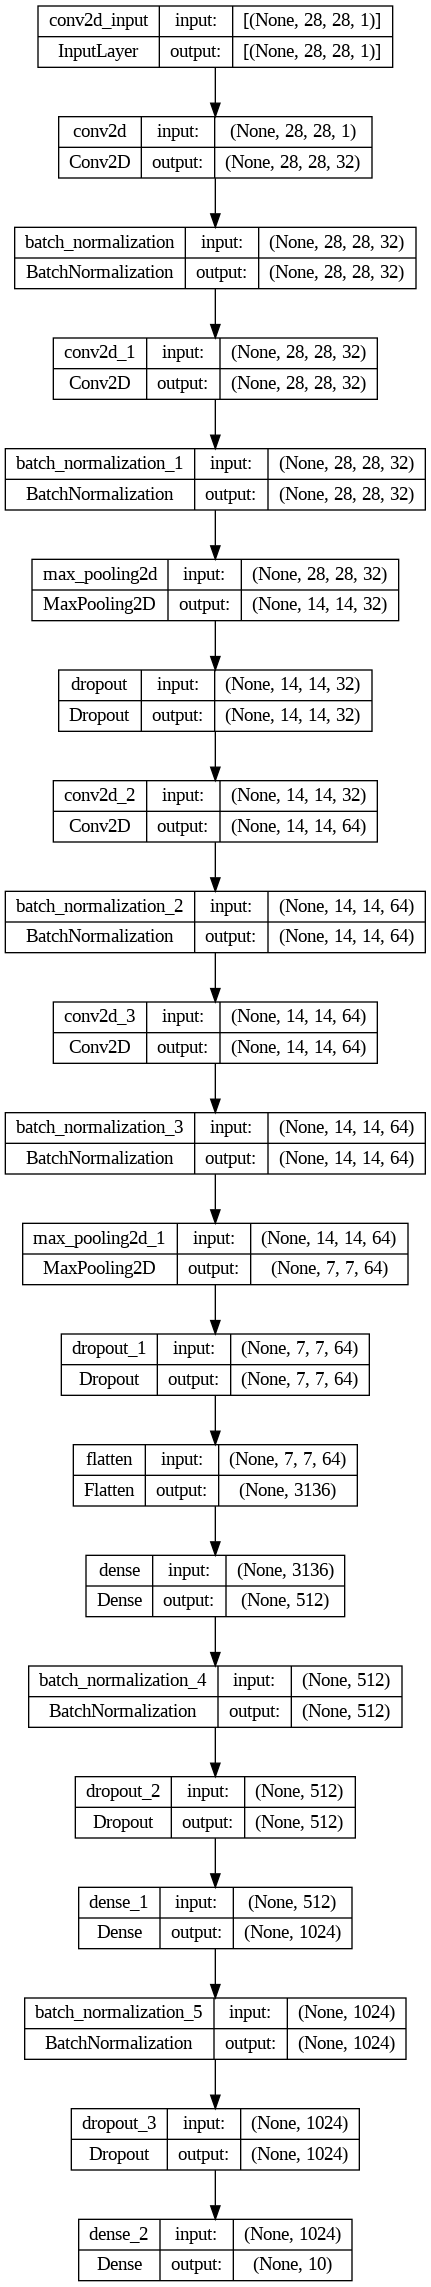

In [ ]:
plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='nadam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)


Epoch 1/20
469/469 [==============================] - 297s 620ms/step - loss: 0.1952 - accuracy: 0.9422
Epoch 2/20
469/469 [==============================] - 289s 617ms/step - loss: 0.0704 - accuracy: 0.9791
Epoch 3/20
469/469 [==============================] - 288s 614ms/step - loss: 0.0518 - accuracy: 0.9836
Epoch 4/20
469/469 [==============================] - 289s 617ms/step - loss: 0.0427 - accuracy: 0.9874
Epoch 5/20
469/469 [==============================] - 289s 616ms/step - loss: 0.0384 - accuracy: 0.9882
Epoch 6/20
469/469 [==============================] - 290s 619ms/step - loss: 0.0352 - accuracy: 0.9890
Epoch 7/20
469/469 [==============================] - 291s 619ms/step - loss: 0.0311 - accuracy: 0.9901
Epoch 8/20
469/469 [==============================] - 290s 619ms/step - loss: 0.0288 - accuracy: 0.9914
Epoch 9/20
469/469 [==============================] - 292s 622ms/step - loss: 0.0268 - accuracy: 0.9916
Epoch 10/20
469/469 [==============================] - 292s 623m

In [ ]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print(f"\nTest accuracy: {round((100.0 * acc),2)}")

79/79 [==============================] - 14s 173ms/step - loss: 0.0262 - accuracy: 0.9938

Test accuracy: 99.38
